# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
dir='C:/Users/gokhan.torlak/Desktop/0.Deep Learning Files-Udemy/Retail Marketing Machine Learning Express Codes and Files/5.Regression Algorithms'
os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir(dir)

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\gokhan.torlak\Desktop\0.Deep Learning Files-Udemy\Retail Marketing Machine Learning Express Codes and Files\6.Classification Algorithms
Current working directory: C:\Users\gokhan.torlak\Desktop\0.Deep Learning Files-Udemy\Retail Marketing Machine Learning Express Codes and Files\5.Regression Algorithms


# Importing the Data for ML 

In [7]:
data = pd.read_csv('Insurance.csv')
data.head()

,id,age,sex,bmi,children,smoker,region,charges
0,C140,19,female,27.900,0,yes,southwest,16884.92400
1,C117,18,male,33.770,1,no,southeast,1725.55230
2,C128,28,male,33.000,3,no,southeast,4449.46200
3,C147,33,male,22.705,0,no,northwest,21984.47061
4,C116,32,male,28.880,0,no,northwest,3866.85520


# Drop any ID kind of Feature

In [8]:
data=data.drop(['id'],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Defining Independent and Target Feature

In [9]:
X=data.drop(['charges'],axis=1)
Y=data[['charges']]

In [10]:
Y.mean()

charges    13270.422265
dtype: float64

# Check for Missing Values

In [11]:
X.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [12]:
Y.isnull().mean()

charges    0.0
dtype: float64

# Split the data into Numerical and Categorical

In [13]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [14]:
num.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [15]:
char.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


# Check for Descriptive Statistics

In [16]:
num.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
1%,18.000000,17.895150,0.000000
5%,18.000000,21.256000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
95%,62.000000,41.106000,3.000000


# Removal of Extreme Values and Outliers from the numerical features

In [17]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return(x)

In [18]:
num=num.apply(lambda x : outlier_cap(x))
num.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.649718,1.094918
std,14.049960,6.025065,1.205493
min,18.000000,17.895150,0.000000
1%,18.000000,17.917294,0.000000
5%,18.000000,21.256000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
95%,62.000000,41.106000,3.000000


# Numerical Feature Discretization and Selection

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned=pd.DataFrame(Bins.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Bin')
num_binned.head()

C:\Users\gokhan.torlak\.conda\envs\myenv1\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(


,age_Bin,bmi_Bin,children_Bin
0,1.0,3.0,0.0
1,0.0,7.0,1.0
2,2.0,6.0,3.0
3,3.0,0.0,0.0
4,3.0,4.0,0.0


In [20]:
num_binned_combined=pd.concat([num_binned,Y],axis=1,join="inner")
num_binned_combined.head()

,age_Bin,bmi_Bin,children_Bin,charges
0,1.0,3.0,0.0,16884.92400
1,0.0,7.0,1.0,1725.55230
2,2.0,6.0,3.0,4449.46200
3,3.0,0.0,0.0,21984.47061
4,3.0,4.0,0.0,3866.85520


In [21]:
num_binned_combined.dtypes

age_Bin         float64
bmi_Bin         float64
children_Bin    float64
charges         float64
dtype: object

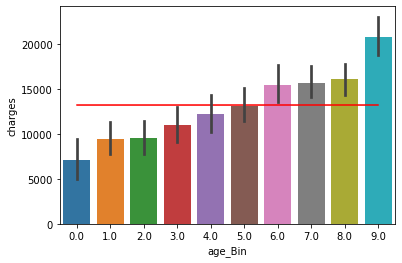

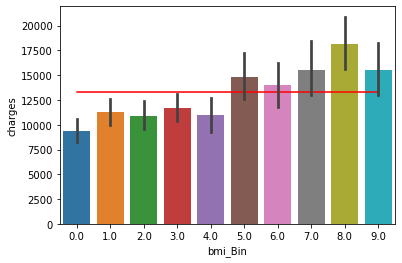

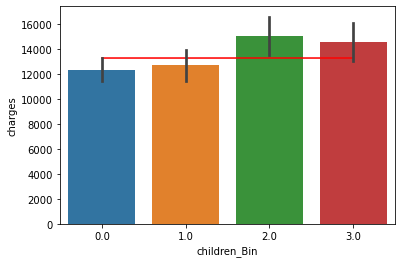

In [22]:
from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=num_binned_combined['charges'].mean(),data=num_binned_combined,color='Red')
    sns.barplot(x=col,y="charges",data=num_binned_combined,estimator=mean)
    plt.show()

# Character Feature Selection

In [23]:
char_combined=pd.concat([char,Y],axis=1,join="inner")

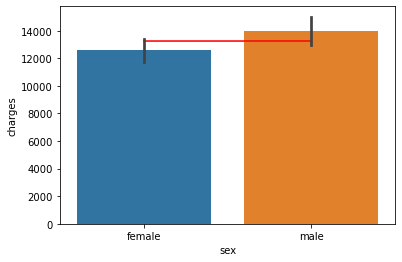

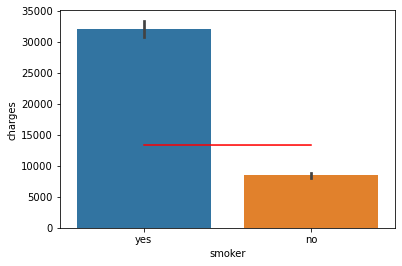

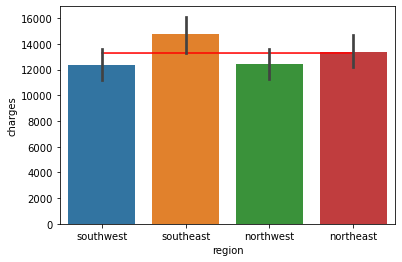

In [24]:
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=char_combined['charges'].mean(),data=char_combined,color='Red')
    sns.barplot(x=col,y="charges",data=char_combined,estimator=mean)
    plt.show()

In [25]:
num_fin=num.drop(['children'],axis=1)
char_fin=char.drop(['region'],axis=1)

In [26]:
num_fin.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [27]:
char_fin.head()

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


# Encode Character Variables

In [28]:
char_encode=pd.get_dummies(char_fin,drop_first=True)
char_encode.head()

,sex_male,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


# Build the complete feature set

In [29]:
X_all=pd.concat([char_encode,num_fin],axis=1,join='inner')

# Splitting the data into Train and Test Sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size = 0.3, random_state = 20)

In [31]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Average Salary in Training Data",y_train.mean())
print("Average Salary in Testing Data",y_test.mean())

Shape of Training Data (936, 4)
Shape of Testing Data (402, 4)
Average Salary in Training Data charges    13287.364425
dtype: float64
Average Salary in Testing Data charges    13230.974848
dtype: float64


# Fitting the Gradient Boosting Regression Model

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=4,random_state = 20)
gbr.fit(X_train,y_train)

C:\Users\gokhan.torlak\.conda\envs\myenv1\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=4, random_state=20)

In [33]:
importance_df=pd.DataFrame(X_train.columns)
importance_df.columns=['features']
importance_df["importances"] = pd.Series(gbr.feature_importances_,)
importance_df=importance_df.sort_values('importances',ascending=False)
importance_df

,features,importances
1,smoker_yes,0.675674
3,bmi,0.203441
2,age,0.118745
0,sex_male,0.002140


<AxesSubplot:xlabel='features', ylabel='importances'>

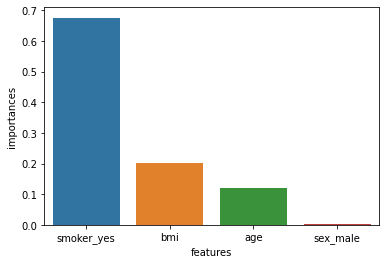

In [34]:
sns.barplot(x="features",y="importances",data=importance_df)

# Evaluating the Model

# R Square Metric Between Training and Testing Sets

In [35]:
gbr_pred_train=gbr.predict(X_train)
gbr_pred_test=gbr.predict(X_test)
gbr_pred_all=gbr.predict(X_all)
X_all['gbr_pred_charges']=pd.DataFrame(gbr_pred_all, index=X_all.index)

In [36]:
from sklearn.metrics import r2_score
r_sq_train=r2_score(gbr_pred_train,y_train)
r_sq_train

0.9093805303050939

In [37]:
from sklearn.metrics import r2_score
r_sq_test=r2_score(gbr_pred_test,y_test)
r_sq_test

0.8447421457309768

# Visualizing the Model Performance 

In [38]:
data_eval=pd.concat([X_all,Y],axis=1,join="inner")

# Create Buckets of Data Observations 

In [39]:
data_eval['charges_rank']=pd.qcut(data_eval['charges'].rank(method='first').values,50,duplicates='drop').codes+1

# Plot the Actuals versus Predicted across those buckets

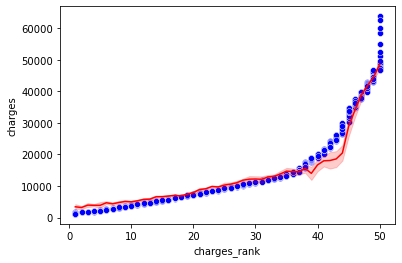

In [40]:
ax=sns.scatterplot(x="charges_rank",y="charges",data=data_eval,color="Blue")
ax=sns.lineplot(x="charges_rank",y="gbr_pred_charges",data=data_eval,color="Red")

# Error Cluster Capture

In [41]:
# Get error percentage between Predicted and Actual Values
data_eval['error']=data_eval['gbr_pred_charges']-data_eval['charges']
data_eval['error_percentage']=(data_eval['error']/data['charges']).abs()
error_df=data_eval[['error_percentage']]

In [42]:
# Build error cluster based on similar error values
from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans')
error_df_bin=pd.DataFrame(Bins.fit_transform(error_df),index=error_df.index, columns=error_df.columns).add_suffix('_bin')
error_df=pd.concat([error_df,error_df_bin],axis=1,join="inner")
error_df.head()

,error_percentage,error_percentage_bin
0,0.002780,0.0
1,0.642979,3.0
2,0.462844,2.0
3,0.575536,3.0
4,0.243410,1.0


In [43]:
# Analyze the error clusters for Observation Capture
model_eval=error_df.groupby('error_percentage_bin')['error_percentage'].agg(['min','max','mean','count'])
model_eval['cum_count']=model_eval['count'].cumsum()
model_eval['cum_count_prop']=model_eval['cum_count']/max(model_eval['cum_count'])

In [44]:
model_eval

,min,max,mean,count,cum_count,cum_count_prop
error_percentage_bin,,,,,,
0.0,0.000081,0.108769,0.040257,587,587,0.438714
1.0,0.109840,0.269352,0.180660,297,884,0.660688
2.0,0.269508,0.485480,0.364350,210,1094,0.817638
3.0,0.487575,0.783855,0.611930,130,1224,0.914798
4.0,0.802517,1.229394,0.967497,59,1283,0.958894
5.0,1.293917,1.906729,1.504665,38,1321,0.987294
6.0,2.098427,3.108934,2.443757,13,1334,0.997010
7.0,4.138461,4.350122,4.244291,2,1336,0.998505
8.0,4.866645,4.866645,4.866645,1,1337,0.999253


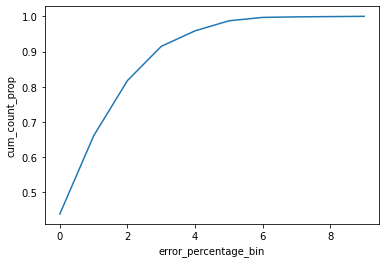

In [45]:
# Visualize the cumulative Observation Capture by Error Clusters
ax=sns.lineplot(x=model_eval.index,y='cum_count_prop',data=model_eval)

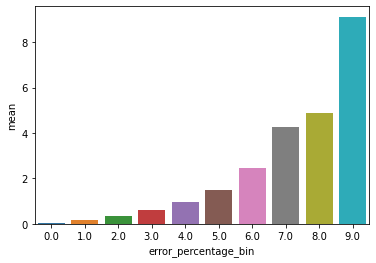

In [46]:
ax=sns.barplot(x=model_eval.index,y='mean',data=model_eval)

In [47]:
import joblib

In [49]:
joblib.dump(gbr, "Gradient_Boosting_Regression_TORLAGO.sav")

['Gradient_Boosting_Regression_TORLAGO.sav']

In [53]:
# load the model from disk
loaded_model = joblib.load("Gradient_Boosting_Regression_TORLAGO.sav")
result = loaded_model.score(X_test, y_test)
print(result)

0.869141421308876
